In [2]:
import keras

In [1]:
import gym
import numpy as np
from tabulate import tabulate
import pandas as pd

In [2]:
env=gym.make('NChain-v0')

In [3]:
class Agent():
    
    def __init__(self):
        self.reward_table=np.zeros((5,2))
        pass
    
    def play(self):
        
     
        state = env.reset()

        endgame=False

        while not endgame:
            
            state= env.env.state
            
            if sum(self.reward_table[state,:])==0:
                action=env.action_space.sample()
            else:
                if np.random.random()<=0.10:
                    action=np.argmin(self.reward_table[state,:])
                else:
                    action=np.argmax(self.reward_table[state,:])
                
            new_state,reward,endgame,_=env.step(action)
            self.reward_table[state,action]+=reward

            state=new_state
        return tabulate(self.reward_table, showindex="always", headers=["State", "Action 0 (step 1 forward)", "Action 1 (back to 0)"])
        

In [4]:
env=gym.make('NChain-v0')
agent=Agent()

rev_table=agent.play()
print(rev_table)

  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                          164                      72
      1                            6                     516
      2                            2                     134
      3                            0                      38
      4                          398                       8


In [5]:
class AgentQ():
    
    def __init__(self):
        self.q_table=np.zeros((5,2))
        self.learning_rate=0.05
        self.discount_factor=0.95
        self.epsilon=0.5
        
        
    
    def play(self):
        
     
        state = env.reset()

        endgame=False

        while not endgame:
            
            if self.__q_table_is_empty(state) or self.__with_probability(self.epsilon):
                action= self.__get_action_by_choosing_randomly(env)
            else:
                action=self.__get_action_with_highest_expected_reward(state)
            

                
            new_state,reward,endgame,_=env.step(action)
            self.q_table[state,action]+=self.learning_rate*(reward+
                                                            self.discount_factor*self._get_expected_reward_in_next_state(new_state)-
                                                           self.q_table[state,action])

            state=new_state
        return tabulate(self.q_table, showindex="always", headers=["State", "Action 0 (step 1 forward)", "Action 1 (back to 0)"])
    
    
    def __q_table_is_empty(self,state):
        return np.sum(self.q_table[state,:])==0
    
    def __with_probability(self,probability):
        return np.random.random()<probability
      
    def __get_action_by_choosing_randomly(self,env):
        return env.action_space.sample()
    
    def __get_action_with_highest_expected_reward(self,state):
        return np.argmax(self.q_table[state,:])
    
    def _get_expected_reward_in_next_state(self,next_state):
        return np.max(self.q_table[next_state,:])
    
    
    
    

In [6]:
env=gym.make('NChain-v0')
agent=AgentQ()

q_table=agent.play()
print(q_table)

  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                     14.2945                 17.2076
      1                     11.5144                 15.9276
      2                      3.88663                12.3921
      3                      3.06962                 2.07583
      4                     10.1465                  6.27448


In [7]:
class AgentQ2():
    
    def __init__(self):
        self.q_table=np.zeros((5,2))
        self.learning_rate=0.05
        self.discount_factor=0.95
        self.epsilon=0.5
        self.decay_factor=0.99
        
        
    
    def play(self, number_of_games=200):
        for game in range(number_of_games):
            
            self.epsilon*=self.decay_factor
            state = env.reset()

            endgame=False

            while not endgame:

                if self.__q_table_is_empty(state) or self.__with_probability(self.epsilon):
                    action= self.__get_action_by_choosing_randomly(env)
                else:
                    action=self.__get_action_with_highest_expected_reward(state)



                new_state,reward,endgame,_=env.step(action)
                self.q_table[state,action]+=self.learning_rate*(reward+
                                                                self.discount_factor*self._get_expected_reward_in_next_state(new_state)-
                                                               self.q_table[state,action])

                state=new_state
            
            print("Game no: {}".format(game))
            print(tabulate(self.q_table, showindex="always", headers=["State", "Action 0 (step 1 forward)", "Action 1 (back to 0)"]))
        
        return tabulate(self.q_table, showindex="always", headers=["State", "Action 0 (step 1 forward)", "Action 1 (back to 0)"])
    
    
    def __q_table_is_empty(self,state):
        return np.sum(self.q_table[state,:])==0
    
    def __with_probability(self,probability):
        return np.random.random()<probability
      
    def __get_action_by_choosing_randomly(self,env):
        return env.action_space.sample()
    
    def __get_action_with_highest_expected_reward(self,state):
        return np.argmax(self.q_table[state,:])
    
    def _get_expected_reward_in_next_state(self,next_state):
        return np.max(self.q_table[next_state,:])
    
    
    
    

In [8]:
env=gym.make('NChain-v0')
agent=AgentQ2()

q_table=agent.play()
print(q_table)

Game no: 0
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                    14.8398                  17.2585
      1                     9.09063                 16.674
      2                     3.10213                 13.1578
      3                     0.584413                 7.87236
      4                     4.57568                  2.49804
Game no: 1
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                     22.2405                 24.4304
      1                     18.7339                 23.1906
      2                     10.5885                 21.4745
      3                      5.13598                16.2801
      4                     14.8601                  8.85744
Game no: 2
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------

Game no: 23
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      56.8387                 56.5487
      1                      59.8016                 57.9093
      2                      64.1342                 58.0695
      3                      70.9211                 57.919
      4                      74.5462                 60.0901
Game no: 24
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      57.492                  56.721
      1                      60.9986                 57.1956
      2                      65.1622                 59.0719
      3                      70.5191                 58.7494
      4                      78.7164                 62.7862
Game no: 25
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  -------------

Game no: 46
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      57.2716                 56.437
      1                      60.6076                 57.1915
      2                      65.5647                 58.9798
      3                      71.3552                 62.4278
      4                      76.037                  60.1615
Game no: 47
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      56.5689                 56.5302
      1                      59.4064                 57.1719
      2                      63.1201                 58.659
      3                      68.0968                 59.0975
      4                      78.9764                 60.618
Game no: 48
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  --------------

Game no: 78
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      61.1189                 60.4144
      1                      64.5349                 61.6861
      2                      70.4971                 62.3358
      3                      77.5748                 64.9567
      4                      85.4669                 69.7651
Game no: 79
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      62.7299                 60.9229
      1                      66.4642                 61.771
      2                      69.9243                 62.866
      3                      76.9834                 63.8137
      4                      89.4797                 66.0121
Game no: 80
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  -------------

Game no: 106
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      61.0843                 61.0357
      1                      64.9229                 61.5781
      2                      69.6208                 63.2037
      3                      79.3196                 63.202
      4                      87.246                  66.7911
Game no: 107
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      64.2839                 61.7441
      1                      68.4794                 61.6526
      2                      72.4133                 64.1834
      3                      78.2212                 64.11
      4                      86.8781                 67.8732
Game no: 108
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  -----------

Game no: 132
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      59.0658                 56.6795
      1                      62.2996                 58.4807
      2                      65.4966                 59.7108
      3                      68.479                  61.4301
      4                      76.734                  62.4605
Game no: 133
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      56.9974                 56.289
      1                      60.4401                 58.5252
      2                      65.4                    59.4931
      3                      73.3869                 62.5161
      4                      83.713                  61.6327
Game no: 134
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ---------

Game no: 163
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      64.2024                 63.3227
      1                      67.263                  64.2731
      2                      71.1868                 65.534
      3                      78.5235                 64.9287
      4                      86.6552                 67.8006
Game no: 164
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      64.5941                 63.5511
      1                      67.6456                 64.5266
      2                      70.6041                 65.9141
      3                      74.76                   66.3845
      4                      81.2445                 70.6597
Game no: 165
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ---------

Game no: 191
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      56.2652                 56.24
      1                      59.1517                 58.4157
      2                      63.4339                 60.9742
      3                      67.7469                 62.1186
      4                      78.1392                 62.2247
Game no: 192
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      58.0408                 55.6813
      1                      61.8026                 57.6948
      2                      66.3952                 60.3333
      3                      72.7241                 61.8592
      4                      81.9387                 63.7703
Game no: 193
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------

In [9]:
import matplotlib.pyplot as plt

In [10]:
class AgentQ_graph():
    
    def __init__(self):
        self.q_table=np.zeros((5,2))
        self.learning_rate=0.05
        self.discount_factor=0.95
        self.epsilon=0.5
        self.decay_factor=0.99
        self.average_reward_for_each_game=[]
        
        
        
    
    def play(self, number_of_games=200):
        for game in range(number_of_games):
            
            self.epsilon*=self.decay_factor
            state = env.reset()
            total_reward=0
            endgame=False

            while not endgame:

                if self.__q_table_is_empty(state) or self.__with_probability(self.epsilon):
                    action= self.__get_action_by_choosing_randomly(env)
                else:
                    action=self.__get_action_with_highest_expected_reward(state)



                new_state,reward,endgame,_=env.step(action)
                total_reward+=reward
                self.q_table[state,action]+=self.learning_rate*(reward+
                                                                self.discount_factor*self._get_expected_reward_in_next_state(new_state)-
                                                               self.q_table[state,action])

                state=new_state
            
            self.average_reward_for_each_game.append(total_reward/1000)
            #print("Game no: {}".format(game))
            #print(tabulate(self.q_table, showindex="always", headers=["State", "Action 0 (step 1 forward)", "Action 1 (back to 0)"]))
        
        return tabulate(self.q_table, showindex="always", headers=["State", "Action 0 (step 1 forward)", "Action 1 (back to 0)"])
    
    
    def __q_table_is_empty(self,state):
        return np.sum(self.q_table[state,:])==0
    
    def __with_probability(self,probability):
        return np.random.random()<probability
      
    def __get_action_by_choosing_randomly(self,env):
        return env.action_space.sample()
    
    def __get_action_with_highest_expected_reward(self,state):
        return np.argmax(self.q_table[state,:])
    
    def _get_expected_reward_in_next_state(self,next_state):
        return np.max(self.q_table[next_state,:])
    

        

  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      57.3976                 57.3991
      1                      60.2776                 59.0916
      2                      64.4106                 61.9131
      3                      71.6066                 65.3249
      4                      74.7738                 65.2342


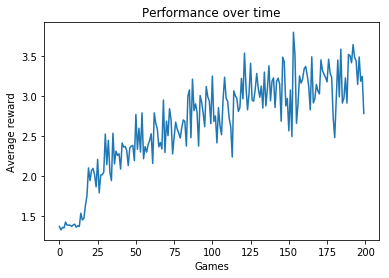

In [11]:
def graph_average_reward(average_reward):
    plt.plot(average_reward)
    plt.title("Performance over time")
    plt.ylabel("Average reward")
    plt.xlabel("Games")
    plt.show()


env=gym.make('NChain-v0')
agent=AgentQ_graph()
q_table=agent.play()
print(q_table)

graph_average_reward(agent.average_reward_for_each_game)


  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      60.0703                 57.521
      1                      63.7509                 59.1261
      2                      67.9259                 59.2141
      3                      71.5333                 59.7803
      4                      79.5436                 64.7629


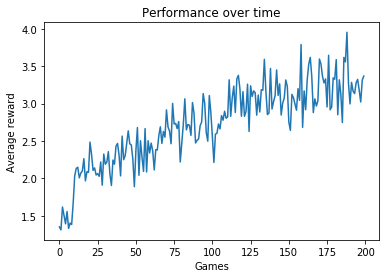

In [12]:
def graph_average_reward(average_reward):
    plt.plot(average_reward)
    plt.title("Performance over time")
    plt.ylabel("Average reward")
    plt.xlabel("Games")
    plt.show()


env=gym.make('NChain-v0')
agent=AgentQ_graph()
q_table=agent.play()
print(q_table)

graph_average_reward(agent.average_reward_for_each_game)

In [15]:
class RouletteAgent():
    def __init__(self):
        self.q_table=np.zeros((1,38))
        self.learning_rate=0.05
        self.discount_factor=0.95
        self.epsilon=0.5
        self.decay_factor=0.99
        self.reward_list=[]
        self.steps_list=[]
        
     
    def play(self, number_of_games=5000):
        self.reward_list=[]
        
        for game in range(number_of_games):
            
            steps=0
            state=env.reset()
            self.epsilon*=self.decay_factor
            total_reward=0
            endgame=False

            while not endgame:

                steps+=1
                if self.__q_table_is_empty() or self.__with_probability(self.epsilon):
                    action=self.__get_action_by_choosing_randomly(env)
                else:
                    action=self.__get_action_with_highest_expected_reward(state)

                new_state,reward,endgame,_=env.step(action)
                total_reward+=reward
                self.q_table[state,action]+=self.learning_rate*(reward+
                                                                self.discount_factor*self.__get_expected_reward_in_next_state(new_state)-
                                                                self.q_table[state,action])


                state=new_state
            self.reward_list.append(total_reward)
            self.steps_list.append(steps)
            #print(game,total_reward)
            #print(self.q_table)
        
    def __q_table_is_empty(self):
        return np.sum(self.q_table[:,:])-1==0
    
    def __with_probability(self, epsilon):
        return np.random.random()<epsilon
    
    def __get_action_by_choosing_randomly(self,env):
        return env.action_space.sample()
    
    def __get_action_with_highest_expected_reward(self,state):
        return np.argmax(self.q_table[state,:])
    
    def __get_expected_reward_in_next_state(self,new_state):
        return np.max(self.q_table[state,:])
    


In [16]:
def graph_total_reward(average_reward):
    plt.plot(average_reward)
    plt.title("Performance over time")
    plt.ylabel("Average reward")
    plt.xlabel("Games")
    plt.show()


env=gym.make('Roulette-v0')

agent=RouletteAgent()
agent.play()


graph_total_reward(agent.reward_list)
graph_total_reward(agent.steps_list)

NameError: name 'state' is not defined

In [361]:
pd.DataFrame(agent.q_table)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.006073,-0.000451,-0.03685,-0.007754,-0.037663,-0.018175,-0.02053,-0.000455,-0.04841,-0.016188,...,-0.037279,-0.03632,-0.034056,-0.038098,-0.022561,-0.016645,-0.01969,-0.009534,-0.006215,0.000002


In [362]:
np.mean(agent.q_table)

-0.026166663581219312

In [ ]:
Neural network

In [3]:
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from keras import optimizers

In [387]:
class Agent_NNQ():
    
    def __init__(self):
        self.learning_rate=0.05
        self.neural_network=NeuralNetwork(self.learning_rate)
        self.discount_factor=0.95
        self.epsilon=0.5
        self.decay_factor=0.99
        self.average_reward_for_each_game=[]
        
        
        
    
    def play(self, number_of_games=200):
        for game in range(number_of_games):
            
            self.epsilon*=self.decay_factor
            state = env.reset()
            total_reward=0
            endgame=False
            step=0
            while not endgame:

                if self.__with_probability(self.epsilon):
                    action= self.__get_action_by_choosing_randomly(env)
                else:
                    action=self.__get_action_with_highest_expected_reward(state)



                new_state,reward,endgame,_=env.step(action)
                total_reward+=reward
                #print("step no: {}".format(step))
                target_output=self.neural_network.predict_expected_rewards_for_each_action(state)
                target_output[action]=reward+self.discount_factor*self._get_expected_reward_in_next_state(new_state)
                
                #print("State is: {}, target output: {}".format(state,target_output))
                self.neural_network.train(state,target_output)

                state=new_state
                step+=1
            
            self.average_reward_for_each_game.append(total_reward/1000)
            print("Game no: {}".format(game))
            print(tabulate(self.neural_network.results(), showindex="always", headers=["State", "Action 0 (step 1 forward)", "Action 1 (back to 0)"]))
        
        return tabulate(self.neural_network.results(), showindex="always", headers=["State", "Action 0 (step 1 forward)", "Action 1 (back to 0)"])
    
    

    
    def __with_probability(self,probability):
        return np.random.random()<probability
      
    def __get_action_by_choosing_randomly(self,env):
        return env.action_space.sample()
    
    def __get_action_with_highest_expected_reward(self,state):
        return np.argmax(self.neural_network.predict_expected_rewards_for_each_action(state))
    
    def _get_expected_reward_in_next_state(self,next_state):
        return np.max(self.neural_network.predict_expected_rewards_for_each_action(next_state))

In [388]:
class NeuralNetwork(Sequential):
    def __init__(self,learning_rate=0.05):
        super().__init__()
        self.add(InputLayer(batch_input_shape=(1,5)))
        self.add(Dense(10,activation='sigmoid'))
        self.add(Dense(2,activation="linear"))
        self.compile(loss='mse', optimizer=optimizers.Adam(lr=learning_rate))
        
    def __covert_state_to_neural_network_input(self, state):
        input_signal=np.zeros((1,5))
        input_signal[0,state]=1
        return input_signal
    
    def train(self,state,target_output):
        input_signal=self.__covert_state_to_neural_network_input(state)
        target_output=target_output.reshape(-1,2)
        self.fit(input_signal, target_output, epochs=1, verbose=0)
    
    def predict_expected_rewards_for_each_action(self,state):
        input_signal=self.__covert_state_to_neural_network_input(state)
        return self.predict(input_signal)[0]
    
    def results(self):
        results=[]
        for state in range(0,5):
            results.append(self.predict_expected_rewards_for_each_action(state))
        return results
        
    

In [ ]:
def graph_average_reward(average_reward):
    plt.plot(average_reward)
    plt.title("Performance over time")
    plt.ylabel("Average reward")
    plt.xlabel("Games")
    plt.show()


env=gym.make('NChain-v0')
agent=Agent_NNQ()
q_table=agent.play()
print(q_table)

graph_average_reward(agent.average_reward_for_each_game)

Game no: 0
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      64.9852                 63.7545
      1                      64.5253                 63.0809
      2                      67.8854                 66.0735
      3                      73.8455                 70.0334
      4                      83.9698                 77.1338
Game no: 1
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      48.811                  48.9939
      1                      51.6902                 51.4919
      2                      56.0552                 53.6712
      3                      60.2758                 55.5156
      4                      67.4189                 59.6673
Game no: 2
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  --------------

Game no: 19
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      58.7819                 56.3683
      1                      61.6724                 58.2799
      2                      65.6552                 59.4209
      3                      72.5692                 61.0769
      4                      79.09                   64.2497
Game no: 20
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      57.0696                 53.3578
      1                      59.9711                 55.1365
      2                      62.4513                 55.6228
      3                      69.9283                 56.7756
      4                      76.2811                 58.7016
Game no: 21
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  -----------

Game no: 38
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      60.6038                 57.9669
      1                      63.8573                 59.4306
      2                      67.7786                 60.588
      3                      74.3895                 61.5944
      4                      81.7274                 61.5634
Game no: 39
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      62.1955                 59.2224
      1                      64.1141                 60.3225
      2                      69.8185                 62.444
      3                      76.7081                 63.4153
      4                      85.7895                 62.3204
Game no: 40
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  -------------

Game no: 57
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      59.0873                 58.6349
      1                      60.912                  59.9028
      2                      66.1054                 62.2044
      3                      71.649                  66.1574
      4                      79.335                  69.8831
Game no: 58
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ----------------------
      0                      59.9902                 59.0351
      1                      62.6124                 59.9538
      2                      66.9045                 60.9161
      3                      72.9573                 63.2091
      4                      80.292                  64.735
Game no: 59
  State    Action 0 (step 1 forward)    Action 1 (back to 0)
-------  ---------------------------  ------------

In [25]:

import keras

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [26]:
import tensorflow as tf

In [27]:
tf.__version__


'2.0.0'